In [39]:
%pip install xlrd
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 6.2 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
print(os.getcwd())


/Users/txjxs/Desktop/datathon/DSA-Datathon-2025/notebooks


In [23]:
import numpy as np 
import pandas as pd 
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath(".."))
from utility import *

In [3]:
FoodAccessAtlas = pd.read_csv("../DATA/FoodAccessResearchAtlasData2019.csv")
FoodAccessAtlas.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [4]:
len(FoodAccessAtlas.columns.tolist())

147

In [5]:
FoodEnvironmentAtlas = pd.ExcelFile("../DATA/FoodEnvironmentAtlas.xls")
FoodEnvironmentAtlas.sheet_names

['Read_Me',
 ' Variable List',
 'Supplemental Data - County',
 'Supplemental Data - State',
 'ACCESS',
 'STORES',
 'RESTAURANTS',
 'ASSISTANCE',
 'INSECURITY',
 'TAXES',
 'LOCAL',
 'HEALTH',
 'SOCIOECONOMIC']

In [6]:
type(FoodEnvironmentAtlas)

pandas.io.excel._base.ExcelFile

In [8]:
for sheet in FoodEnvironmentAtlas.sheet_names:
    if sheet == " Variable List":
        continue
    elif sheet == "Read_Me":
        continue    
    else:
        df  = FoodEnvironmentAtlas.parse(sheet)
        df.to_csv("../DATA/FoodEnvironmentAtlas" + sheet + ".csv", index=False)

In [9]:
FoodAccessAtlas.info(verbose=True, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 147 columns):
 #    Column                Non-Null Count  Dtype  
---   ------                --------------  -----  
 0    CensusTract           72531 non-null  int64  
 1    State                 72531 non-null  object 
 2    County                72531 non-null  object 
 3    Urban                 72531 non-null  int64  
 4    Pop2010               72531 non-null  int64  
 5    OHU2010               72531 non-null  int64  
 6    GroupQuartersFlag     72531 non-null  int64  
 7    NUMGQTRS              72506 non-null  float64
 8    PCTGQTRS              72506 non-null  float64
 9    LILATracts_1And10     72531 non-null  int64  
 10   LILATracts_halfAnd10  72531 non-null  int64  
 11   LILATracts_1And20     72531 non-null  int64  
 12   LILATracts_Vehicle    72531 non-null  int64  
 13   HUNVFlag              72531 non-null  int64  
 14   LowIncomeTracts       72531 non-null  int64  
 15   

In [10]:
missing_report_df = missing_report(FoodAccessAtlas, top_n=None)

In [11]:
missing_report_df

,Missing (%)
lanhopi20,97.923646
lalowi20,97.923646
lanhopi20share,97.923646
laaian20,97.923646
laaian20share,97.923646
...,...
LATracts_half,0.000000
LATracts1,0.000000
LATracts10,0.000000
LATracts20,0.000000


In [12]:
Columns_to_drop = missing_report_df[missing_report_df["Missing (%)"] >= 50].index.tolist()

In [13]:
Columns_to_drop.__len__()

52

In [14]:
FoodAccessAtlascleaned = FoodAccessAtlas.drop(columns=Columns_to_drop, inplace=False)

In [15]:
FoodAccessAtlascleaned.shape

(72531, 95)

In [16]:
FoodAccessAtlascleaned.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 95 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CensusTract           72531 non-null  int64  
 1   State                 72531 non-null  object 
 2   County                72531 non-null  object 
 3   Urban                 72531 non-null  int64  
 4   Pop2010               72531 non-null  int64  
 5   OHU2010               72531 non-null  int64  
 6   GroupQuartersFlag     72531 non-null  int64  
 7   NUMGQTRS              72506 non-null  float64
 8   PCTGQTRS              72506 non-null  float64
 9   LILATracts_1And10     72531 non-null  int64  
 10  LILATracts_halfAnd10  72531 non-null  int64  
 11  LILATracts_1And20     72531 non-null  int64  
 12  LILATracts_Vehicle    72531 non-null  int64  
 13  HUNVFlag              72531 non-null  int64  
 14  LowIncomeTracts       72531 non-null  int64  
 15  PovertyRate        

In [18]:
FoodAccessAtlascleaned.drop(columns=["GroupQuartersFlag", "NUMGQTRS"], inplace=True)

In [19]:
FoodAccessAtlascleaned.shape

(72531, 93)

In [20]:
binary_cols = get_binary_and_continuous_columns(FoodAccessAtlascleaned)["binary"]
continious_col = get_binary_and_continuous_columns(FoodAccessAtlascleaned)["continuous"]

In [21]:
binary_cols.__len__(), continious_col.__len__()

(15, 76)

In [22]:
for col in continious_col:
    print(f"{col}: {FoodAccessAtlascleaned[col].isnull().sum()}")   

CensusTract: 0
Pop2010: 0
OHU2010: 0
PCTGQTRS: 25
PovertyRate: 3
MedianFamilyIncome: 748
LAPOP1_10: 29957
LAPOP05_10: 14540
LAPOP1_20: 35914
LALOWI1_10: 29957
LALOWI05_10: 14540
LALOWI1_20: 35914
lapophalf: 4568
lapophalfshare: 4568
lalowihalf: 4568
lalowihalfshare: 4568
lakidshalf: 4568
lakidshalfshare: 4568
laseniorshalf: 4568
laseniorshalfshare: 4568
lawhitehalf: 4568
lawhitehalfshare: 4568
lablackhalf: 4568
lablackhalfshare: 4568
laasianhalf: 4568
laasianhalfshare: 4568
lanhopihalf: 4568
lanhopihalfshare: 4568
laaianhalf: 4568
laaianhalfshare: 4568
laomultirhalf: 4568
laomultirhalfshare: 4568
lahisphalf: 4568
lahisphalfshare: 4568
lahunvhalf: 4568
lahunvhalfshare: 4562
lasnaphalf: 4568
lasnaphalfshare: 4562
lapop1: 19989
lapop1share: 19989
lalowi1: 19989
lalowi1share: 19989
lakids1: 19989
lakids1share: 19989
laseniors1: 19989
laseniors1share: 19989
lawhite1: 19989
lawhite1share: 19989
lablack1: 19989
lablack1share: 19989
laasian1: 19989
laasian1share: 19989
lanhopi1: 19989
lanhopi1

In [24]:
missing_report_df = missing_report(FoodAccessAtlascleaned, top_n=None, percent=True)

In [25]:
missing_report_df.shape

(93, 1)

<Axes: >

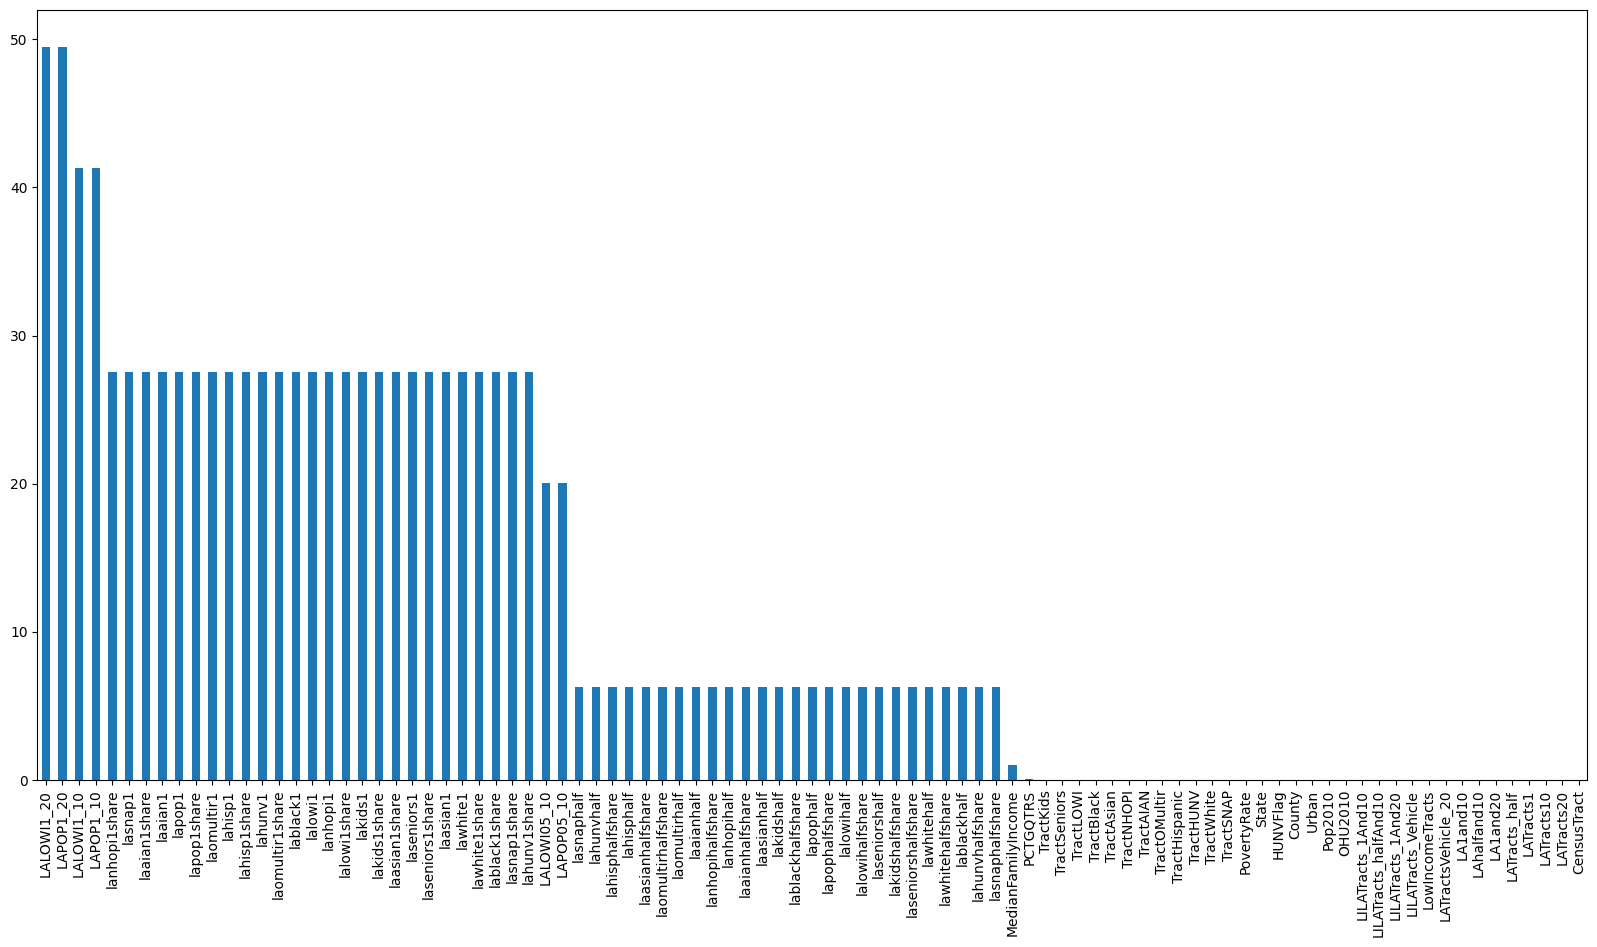

In [31]:
missing_report_df["Missing (%)"].plot(kind="bar", figsize=(20, 10))

In [29]:
cols_missing_with_grtr_30 = missing_report_df[missing_report_df["Missing (%)"] > 30].index.tolist()

In [30]:
cols_missing_with_grtr_30

['LALOWI1_20', 'LAPOP1_20', 'LALOWI1_10', 'LAPOP1_10']

In [31]:
cols_missing_15_30 = missing_report_df[
    (missing_report_df["Missing (%)"] >= 15) & 
    (missing_report_df["Missing (%)"] <= 30)
].index.tolist() 


In [32]:
cols_missing_15_30

['lanhopi1share',
 'lasnap1',
 'laaian1share',
 'laaian1',
 'lapop1',
 'lapop1share',
 'laomultir1',
 'lahisp1',
 'lahisp1share',
 'lahunv1',
 'laomultir1share',
 'lablack1',
 'lalowi1',
 'lanhopi1',
 'lalowi1share',
 'lakids1',
 'lakids1share',
 'laasian1share',
 'laseniors1',
 'laseniors1share',
 'laasian1',
 'lawhite1',
 'lawhite1share',
 'lablack1share',
 'lasnap1share',
 'lahunv1share',
 'LALOWI05_10',
 'LAPOP05_10']

In [81]:
def plot_boxplots(df, columns, figsize=(12, 6), rotation=45):
    """
    Plots boxplots for a list of numeric columns from a DataFrame.

    Parameters:
    - df (pd.DataFrame): Your data
    - columns (list): List of column names to plot
    - figsize (tuple): Size of the plot canvas
    - rotation (int): Angle of x-axis labels
    """
    num_cols = len(columns)
    fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(figsize[0] * num_cols, figsize[1]))

    if num_cols == 1:
        axes = [axes]

    for ax, col in zip(axes, columns):
        sns.boxplot(data=df, y=col, ax=ax)
        ax.set_title(col)
        ax.set_ylabel('')
        ax.tick_params(axis='x', rotation=rotation)

    plt.tight_layout()
    plt.show()

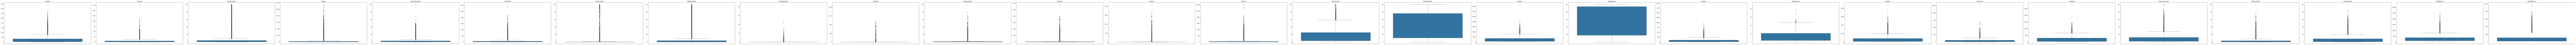

In [82]:
plot_boxplots(FoodAccessAtlas, cols_missing_15_30)


In [42]:
def smart_impute(df, cols):
    df_copy = df.copy()
    for col in cols:
        if df_copy[col].skew() > 1:
            df_copy[col] = df_copy[col].fillna(df_copy[col].median())
        else:
            df_copy[col] = df_copy[col].fillna(df_copy[col].mean())
    return df_copy


In [43]:
type(smart_impute)

function

In [44]:
imputed_df = FoodAccessAtlascleaned.copy()

In [45]:
type(imputed_df)

pandas.core.frame.DataFrame

In [40]:
cols_missing_15_30

['lanhopi1share',
 'lasnap1',
 'laaian1share',
 'laaian1',
 'lapop1',
 'lapop1share',
 'laomultir1',
 'lahisp1',
 'lahisp1share',
 'lahunv1',
 'laomultir1share',
 'lablack1',
 'lalowi1',
 'lanhopi1',
 'lalowi1share',
 'lakids1',
 'lakids1share',
 'laasian1share',
 'laseniors1',
 'laseniors1share',
 'laasian1',
 'lawhite1',
 'lawhite1share',
 'lablack1share',
 'lasnap1share',
 'lahunv1share',
 'LALOWI05_10',
 'LAPOP05_10']

In [47]:
imputed_df1 = smart_impute(imputed_df, cols_missing_15_30)

In [48]:
type(imputed_df1)

pandas.core.frame.DataFrame

In [50]:
missing_report_imputed_df = missing_report(imputed_df1, top_n=None)

In [74]:
missing_report_imputed_df[
    (missing_report_imputed_df["Missing (%)"] >= 15) & 
    (missing_report_imputed_df["Missing (%)"] <= 30)
].index.tolist() 

[]

<Axes: >

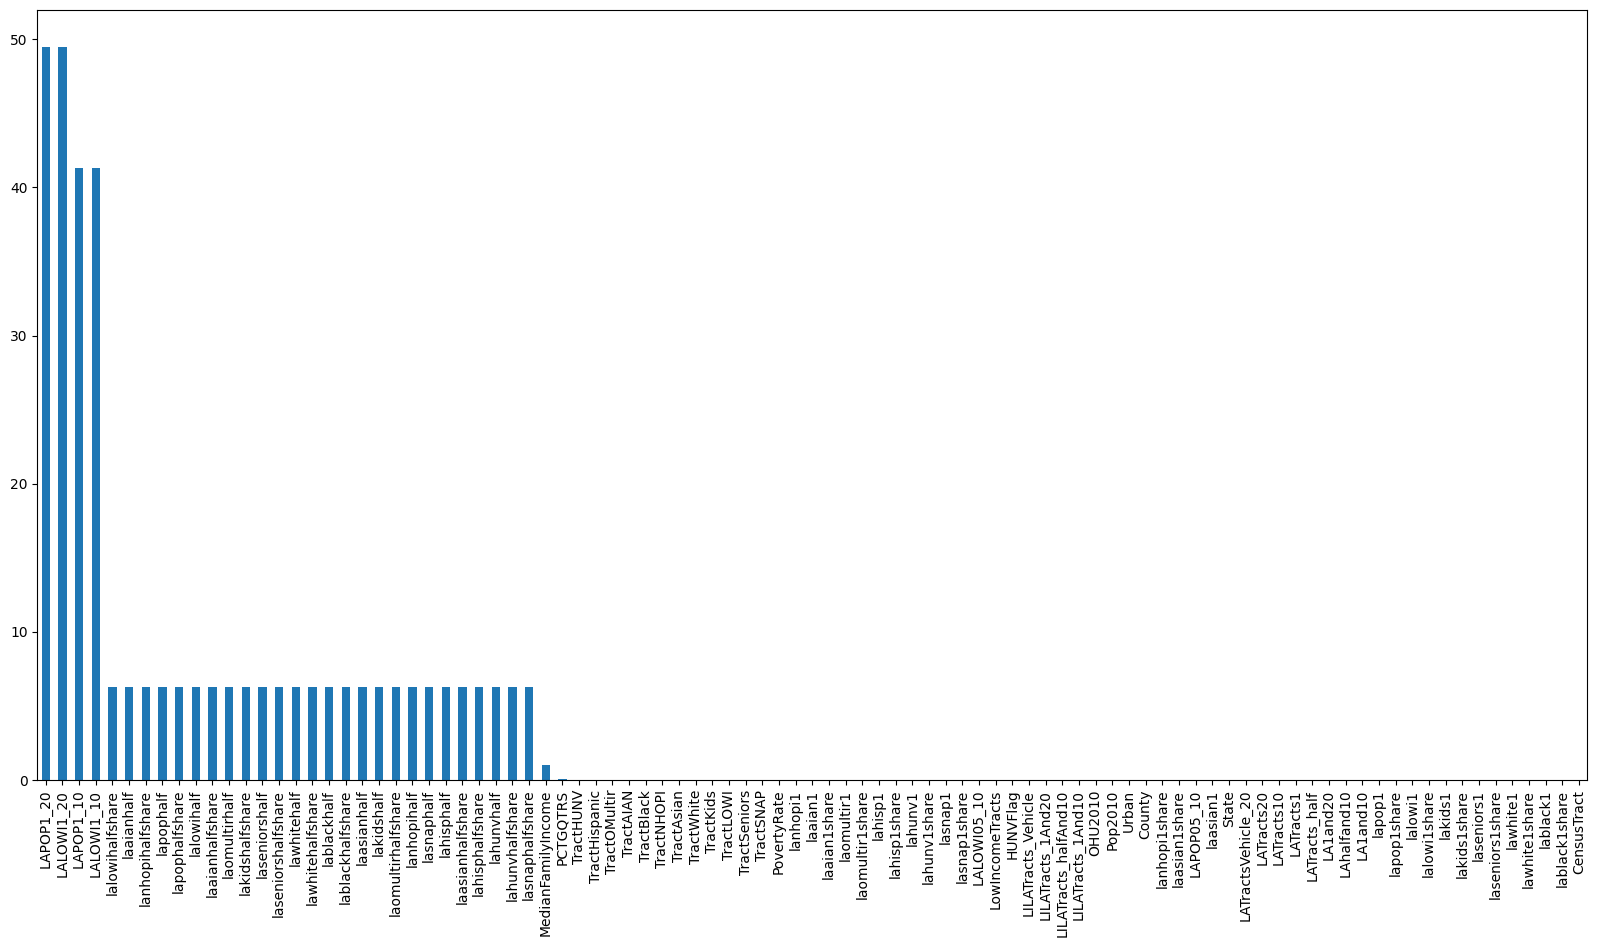

In [56]:
missing_report_imputed_df["Missing (%)"].plot(kind="bar", figsize=(20, 10))

In [57]:
imputed_df1.to_csv("../DATA/FoodAccessAtlascleaned.csv", index=False)

In [84]:
cols_missing_0_30 = missing_report_imputed_df[
    (missing_report_imputed_df["Missing (%)"] > 0) &
    (missing_report_imputed_df["Missing (%)"]  < 30)  
].index.tolist()

In [85]:
cols_missing_0_30

['laomultir1share',
 'laomultir1',
 'laaian1share',
 'laaian1',
 'lawhite1',
 'lahisp1share',
 'lawhite1share',
 'lanhopi1share',
 'lanhopi1',
 'laasian1share',
 'laasian1',
 'lablack1share',
 'lahisp1',
 'lablack1',
 'lahunv1',
 'lakids1share',
 'lapop1',
 'lapop1share',
 'lalowi1',
 'lakids1',
 'lalowi1share',
 'laseniors1',
 'laseniors1share',
 'lasnap1',
 'lahunv1share',
 'lasnap1share',
 'LALOWI05_10',
 'LAPOP05_10']

In [ ]:
imputed_df1 = smart_impute(imputed_df, cols_missing_0_30)

In [82]:
missing_report_imputed_df = missing_report(imputed_df1, top_n=None)

<Axes: >

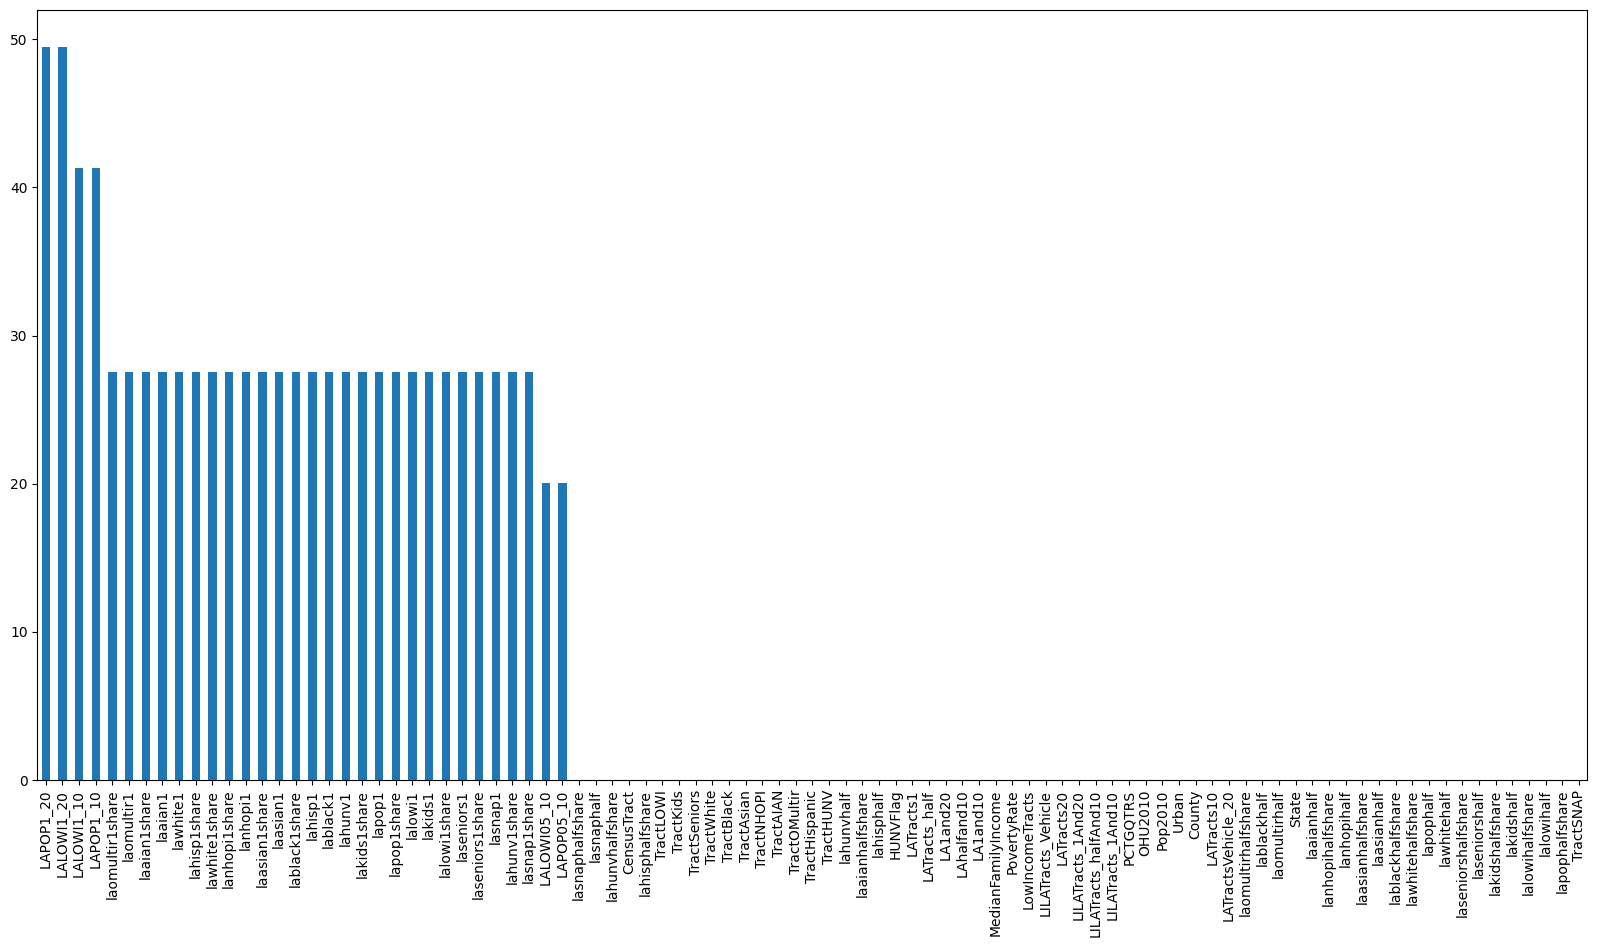

In [83]:
missing_report_imputed_df["Missing (%)"].plot(kind="bar", figsize=(20, 10))

In [94]:
FoodAccessAtlascleaned = smart_impute(FoodAccessAtlascleaned, cols_missing_0_30)

In [98]:
FoodAccessAtlascleaned_missing_report = missing_report(FoodAccessAtlascleaned, top_n=None)

<Axes: >

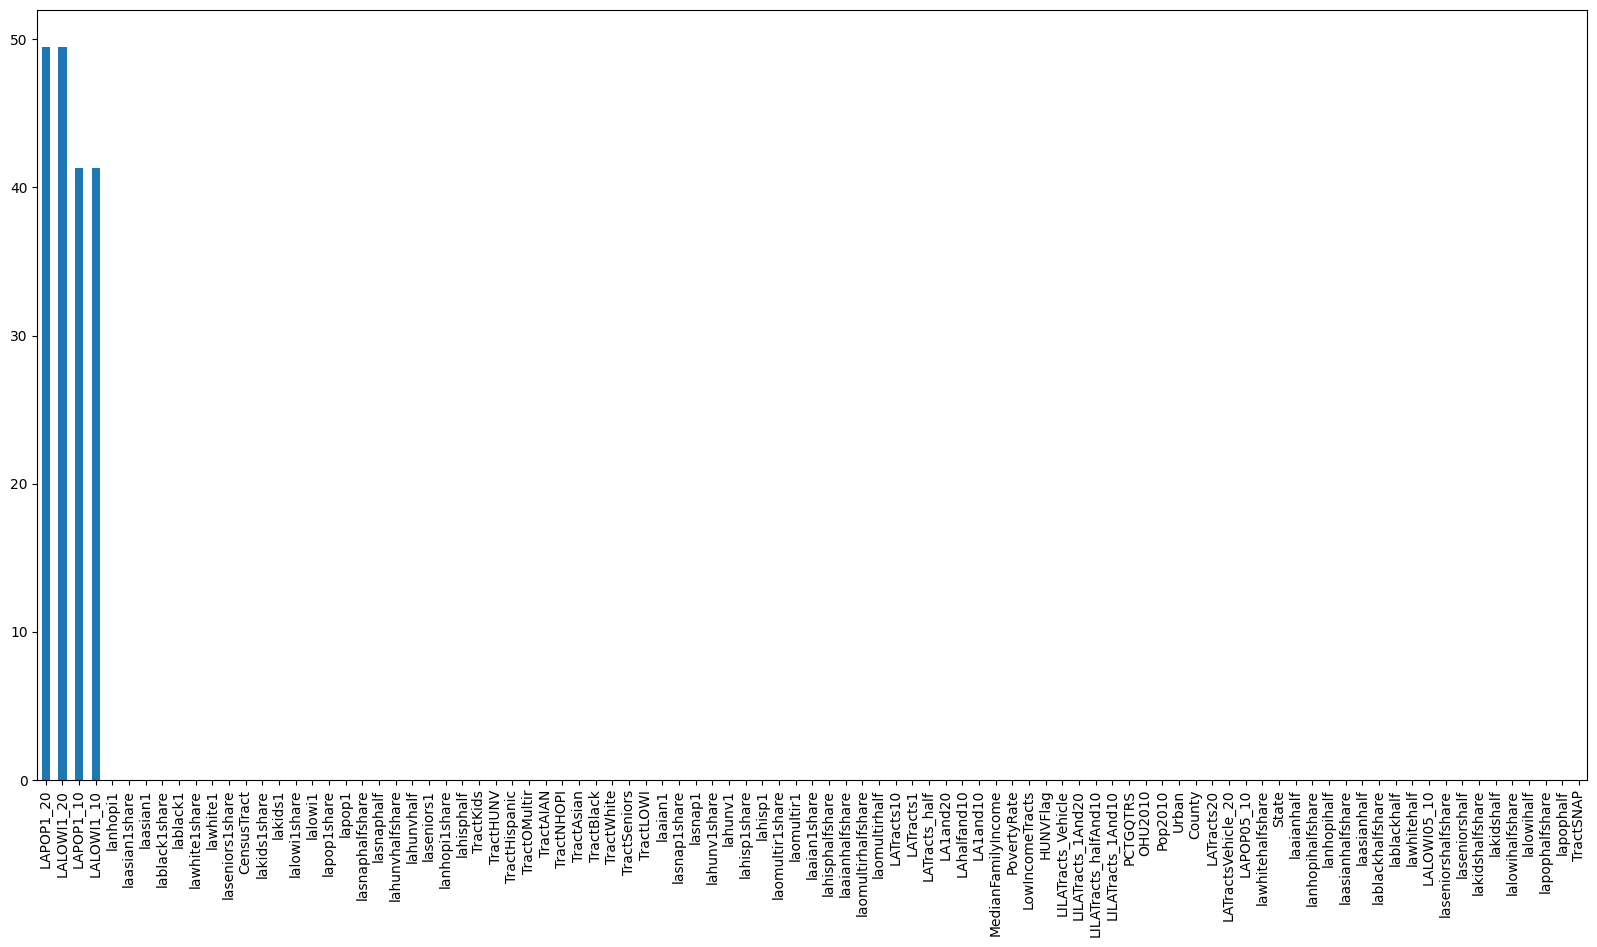

In [99]:
FoodAccessAtlascleaned_missing_report["Missing (%)"].plot(kind="bar", figsize=(20, 10))

In [100]:
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
    ERROR: Command errored out with exit status 1:
     command: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/c7/fkzc0qks7t54mf9fn3lmg8dh0000gn/T/pip-install-4w4heqm3/sklearn_9fdbe82090574e0ba62fd8192fd8f5dc/setup.py'"'"'; __file__='"'"'/private/var/folders/c7/fkzc0qks7t54mf9fn3lmg8dh0000gn/T/pip-install-4w4heqm3/sklearn_9fdbe82090574e0ba62fd8192fd8f5dc/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/c7/fkzc0qks7t54mf9fn3lmg8dh0000gn/T/pip-pip-egg-info-hxfd4675
         cwd: /private/var/folders/c7/fkzc0qks7t54mf9fn3lmg8dh0000gn/T/pip-install-4w4heqm

In [101]:
from sklearn.impute import KNNImputer

def apply_knn_imputer(df, columns=None, n_neighbors=5):
    """
    Applies KNN imputation to specified columns in the DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame
    - columns (list, optional): Subset of columns to impute. If None, all numeric columns are used.
    - n_neighbors (int): Number of neighbors to use for imputation

    Returns:
    - pd.DataFrame: New DataFrame with imputed values
    """
    df_copy = df.copy()
    
    if columns is None:
        columns = df_copy.select_dtypes(include='number').columns.tolist()
    
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_copy[columns] = imputer.fit_transform(df_copy[columns])
    
    return df_copy


In [102]:


# Or only a subset of columns with missing data

FoodAccessAtlascleaned_Final = apply_knn_imputer(FoodAccessAtlascleaned, columns=cols_missing_with_grtr_30, n_neighbors=5)


In [103]:
FoodAccessAtlascleaned_Final_missing_report = missing_report(FoodAccessAtlascleaned_Final, top_n=None)

<Axes: >

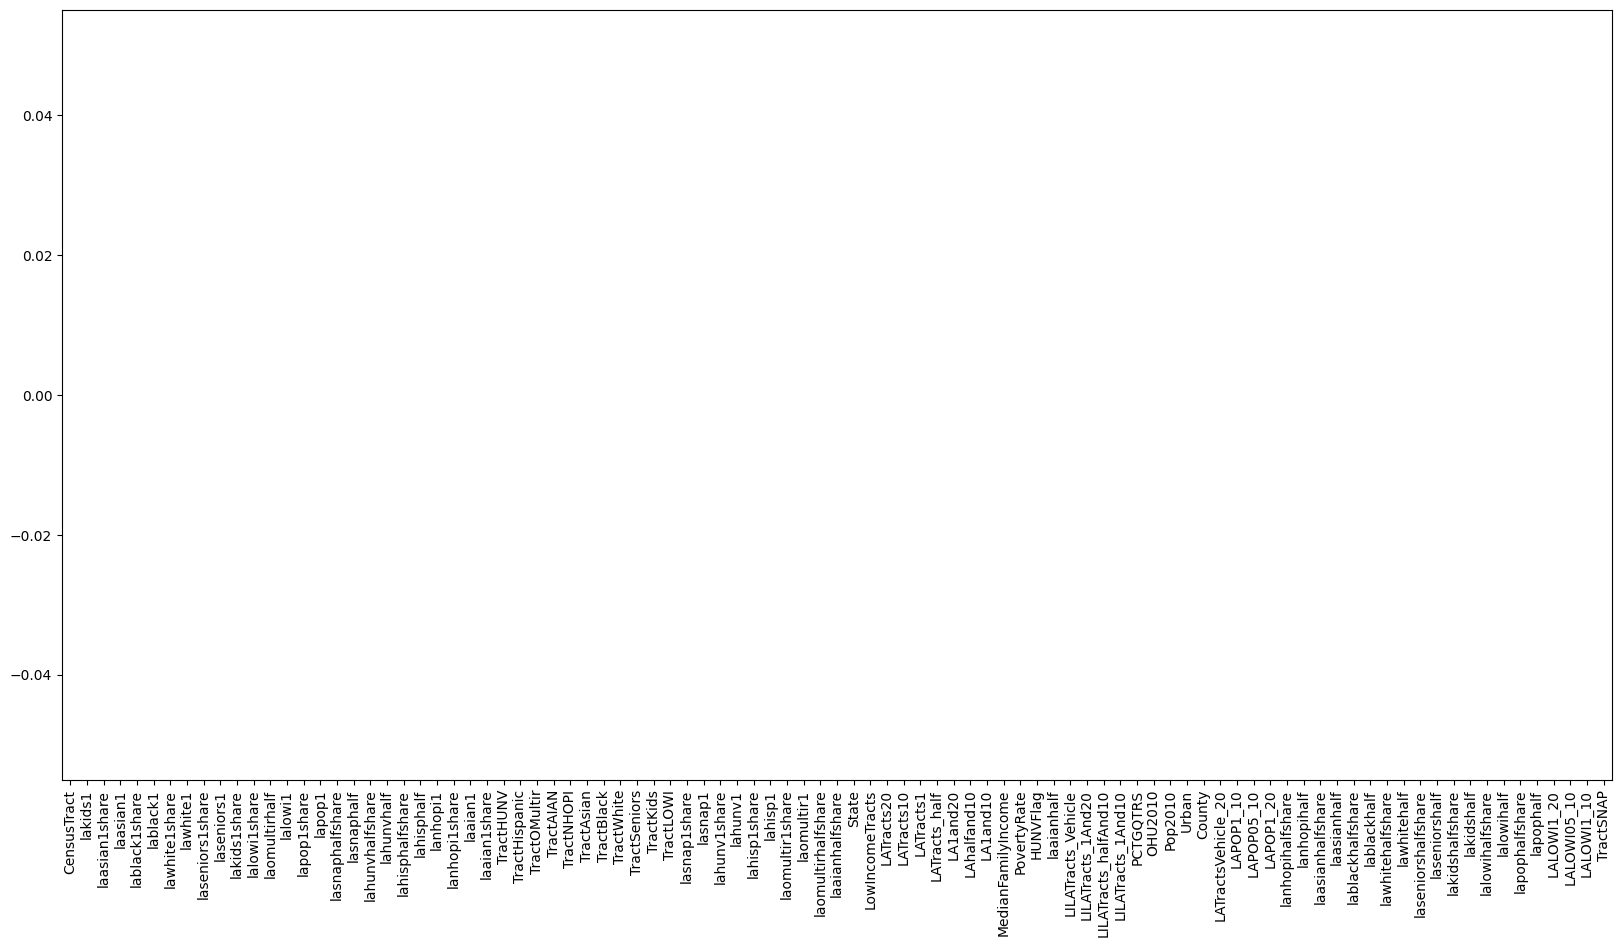

In [105]:
FoodAccessAtlascleaned_Final_missing_report["Missing (%)"].plot(kind="bar", figsize=(20, 10))

In [108]:
FoodAccessAtlascleaned_Final.to_csv("../DATA/FoodAccessAtlascleaned.csv", index=False)

In [109]:
FoodAccessAtlascleaned_Final = pd.read_csv("../DATA/FoodAccessAtlascleaned.csv")    

In [112]:

# Assuming 'df' is your cleaned DataFrame loaded from the cleaned CSV file
# For example:
# df = pd.read_csv("FoodAccessAtlascleaned.csv")

# Define the is_desert flag:
FoodAccessAtlascleaned_Final['is_desert'] = (((FoodAccessAtlascleaned_Final['LILATracts_halfAnd10'] == 1) | (FoodAccessAtlascleaned_Final['LILATracts_1And20'] == 1)) & (FoodAccessAtlascleaned_Final['HUNVFlag'] == 1)).astype(int)

# Check the resulting distribution of is_desert
print(FoodAccessAtlascleaned_Final['is_desert'].value_counts())


is_desert
0    63977
1     8554
Name: count, dtype: int64


In [115]:
FoodAccessAtlascleaned_corr = FoodAccessAtlascleaned_Final.dtypes[FoodAccessAtlascleaned_Final.dtypes != "object"].corr() 

TypeError: corr() missing 1 required positional argument: 'other'

In [117]:

numeric_df = FoodAccessAtlascleaned_Final.select_dtypes(include='number')


In [118]:
corr_matrix = numeric_df.corr()

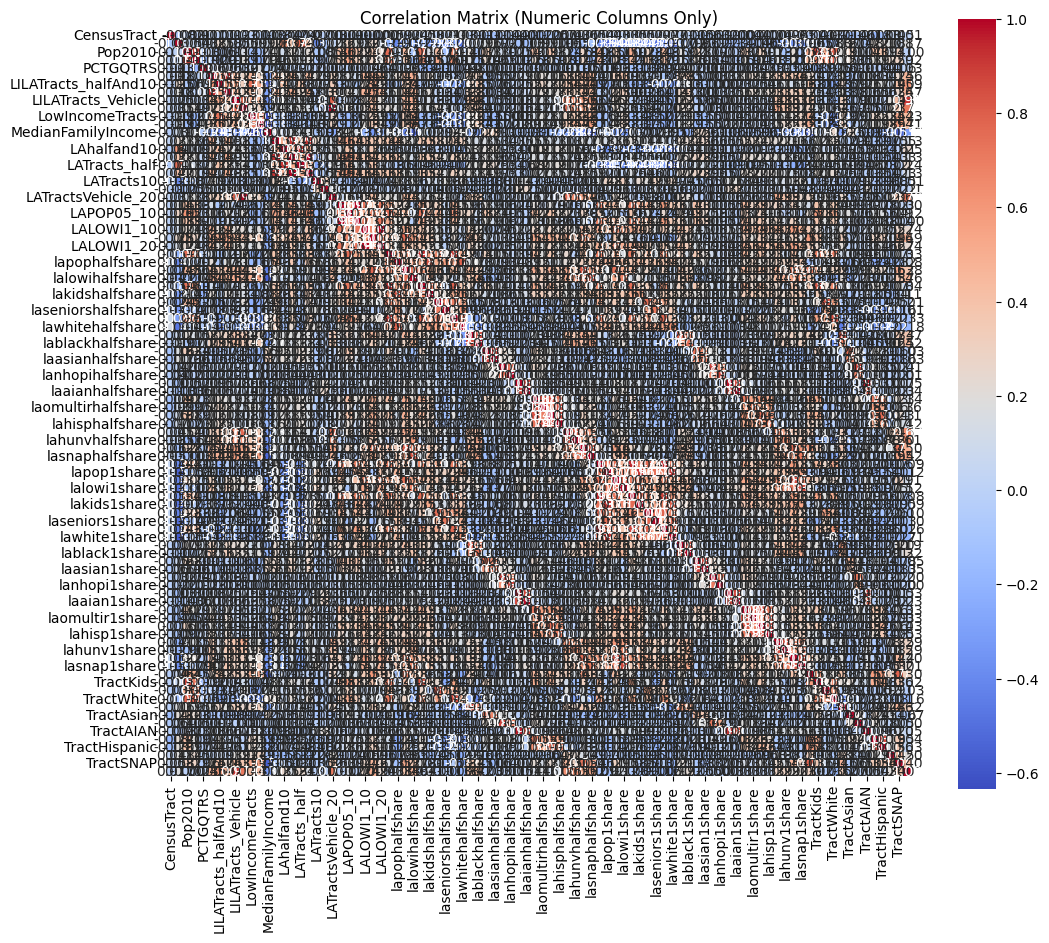

In [119]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.show()

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


<Axes: >

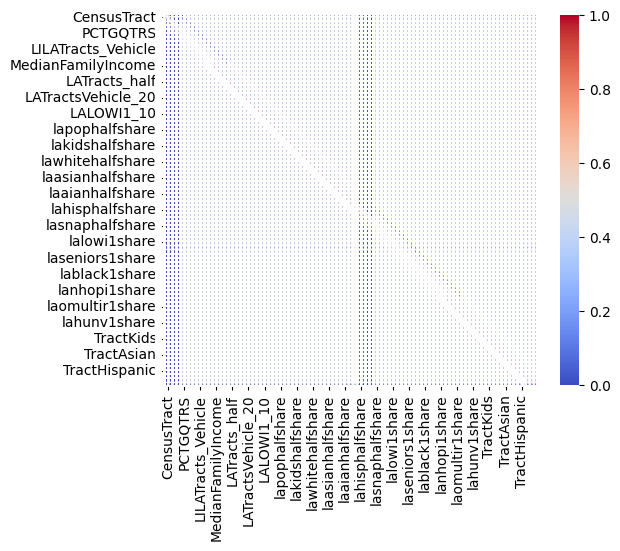

In [128]:
abs_corr_matrix = corr_matrix[corr_matrix.abs() >= 1].fillna(0)
sns.heatmap(abs_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)


In [130]:
corr_with_is_desert = corr_matrix['is_desert'].sort_values(ascending=False)

In [131]:
corr_with_is_desert

is_desert             1.000000
LILATracts_Vehicle    0.907744
HUNVFlag              0.707464
LATractsVehicle_20    0.699215
lahunvhalf            0.627877
                        ...   
TractWhite           -0.160000
lawhite1             -0.163799
lawhitehalfshare     -0.184229
lawhite1share        -0.205982
MedianFamilyIncome   -0.311521
Name: is_desert, Length: 92, dtype: float64

In [132]:
print("Top 10 positive correlations with is_desert:")
print(corr_with_is_desert.head(10))

print("\nTop 10 negative correlations with is_desert:")
print(corr_with_is_desert.tail(10))

Top 10 positive correlations with is_desert:
is_desert               1.000000
LILATracts_Vehicle      0.907744
HUNVFlag                0.707464
LATractsVehicle_20      0.699215
lahunvhalf              0.627877
lahunvhalfshare         0.614936
LILATracts_halfAnd10    0.587593
lasnaphalfshare         0.523319
lasnaphalf              0.500981
LALOWI05_10             0.490956
Name: is_desert, dtype: float64

Top 10 negative correlations with is_desert:
lapop1               -0.094801
laseniors1           -0.096936
laseniors1share      -0.102302
lapop1share          -0.115348
lawhitehalf          -0.129378
TractWhite           -0.160000
lawhite1             -0.163799
lawhitehalfshare     -0.184229
lawhite1share        -0.205982
MedianFamilyIncome   -0.311521
Name: is_desert, dtype: float64


In [145]:
# Extract correlation with is_desert
corr_with_is_desert = corr_matrix['is_desert']

# Filter for strong correlations (absolute value >= 0.7)
strong_corr = corr_with_is_desert[abs(corr_with_is_desert) >= 0.5]

print("Columns with correlation >= 0.7 or <= -0.7 with is_desert:")
print(strong_corr)


Columns with correlation >= 0.7 or <= -0.7 with is_desert:
LILATracts_halfAnd10    0.587593
LILATracts_Vehicle      0.907744
HUNVFlag                0.707464
LATractsVehicle_20      0.699215
lahunvhalf              0.627877
lahunvhalfshare         0.614936
lasnaphalf              0.500981
lasnaphalfshare         0.523319
is_desert               1.000000
Name: is_desert, dtype: float64


In [146]:
strong_corr_cols = strong_corr.index.tolist()

In [150]:
FoodAccessAtlascleaned_Final[strong_corr_cols].head()

,LILATracts_halfAnd10,LILATracts_Vehicle,HUNVFlag,LATractsVehicle_20,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,is_desert
0,0,0,0,0,5.0,0.79,92.0,13.33,0
1,1,0,0,0,93.0,12.47,161.0,21.70,0
2,0,0,0,0,39.0,3.09,139.0,11.05,0
3,0,0,0,0,19.0,1.13,84.0,4.88,0
4,0,0,1,1,164.0,4.01,235.0,5.76,0


In [151]:
FoodAccessAtlascleaned_Final.head()


,CensusTract,State,County,Urban,Pop2010,OHU2010,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,is_desert
0,1001020100,Alabama,Autauga County,1,1912,693,0.00,0,0,0,...,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0,0
1,1001020200,Alabama,Autauga County,1,2170,743,8.34,1,1,1,...,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0,0
2,1001020300,Alabama,Autauga County,1,3373,1256,0.00,0,0,0,...,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0,0
3,1001020400,Alabama,Autauga County,1,4386,1722,0.00,0,0,0,...,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0,0
4,1001020500,Alabama,Autauga County,1,10766,4082,1.68,0,0,0,...,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0,0


In [152]:
def smart_impute_grouped(df, cols, group_col, skew_threshold=1):
    """
    Imputes missing values in specified columns using group-specific statistics.
    
    For each column, groups the DataFrame by `group_col` and fills missing values with:
      - The group's median if the column's skew > skew_threshold,
      - Otherwise, the group's mean.
      
    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - cols (list): List of column names to impute.
    - group_col (str): Column name to group by (e.g., 'FIPS' or 'County').
    - skew_threshold (float): Threshold for skew to decide median vs mean imputation (default 1).
    
    Returns:
    - pd.DataFrame: A new DataFrame with imputed values.
    """
    df_copy = df.copy()
    for col in cols:
        df_copy[col] = df_copy.groupby(group_col)[col].transform(
            lambda x: x.fillna(x.median() if x.skew() > skew_threshold else x.mean())
        )
    return df_copy


In [153]:
FoodAccessAtlascleaned_impute_grp = FoodAccessAtlas.drop(columns=Columns_to_drop, inplace=False)

In [155]:
imputed_df_grouped = smart_impute_grouped(FoodAccessAtlascleaned_impute_grp, cols_missing_0_30, 'County', skew_threshold=1)   

In [156]:
imputed_df_grouped_missing_report = missing_report(imputed_df_grouped, top_n=None)

<Axes: >

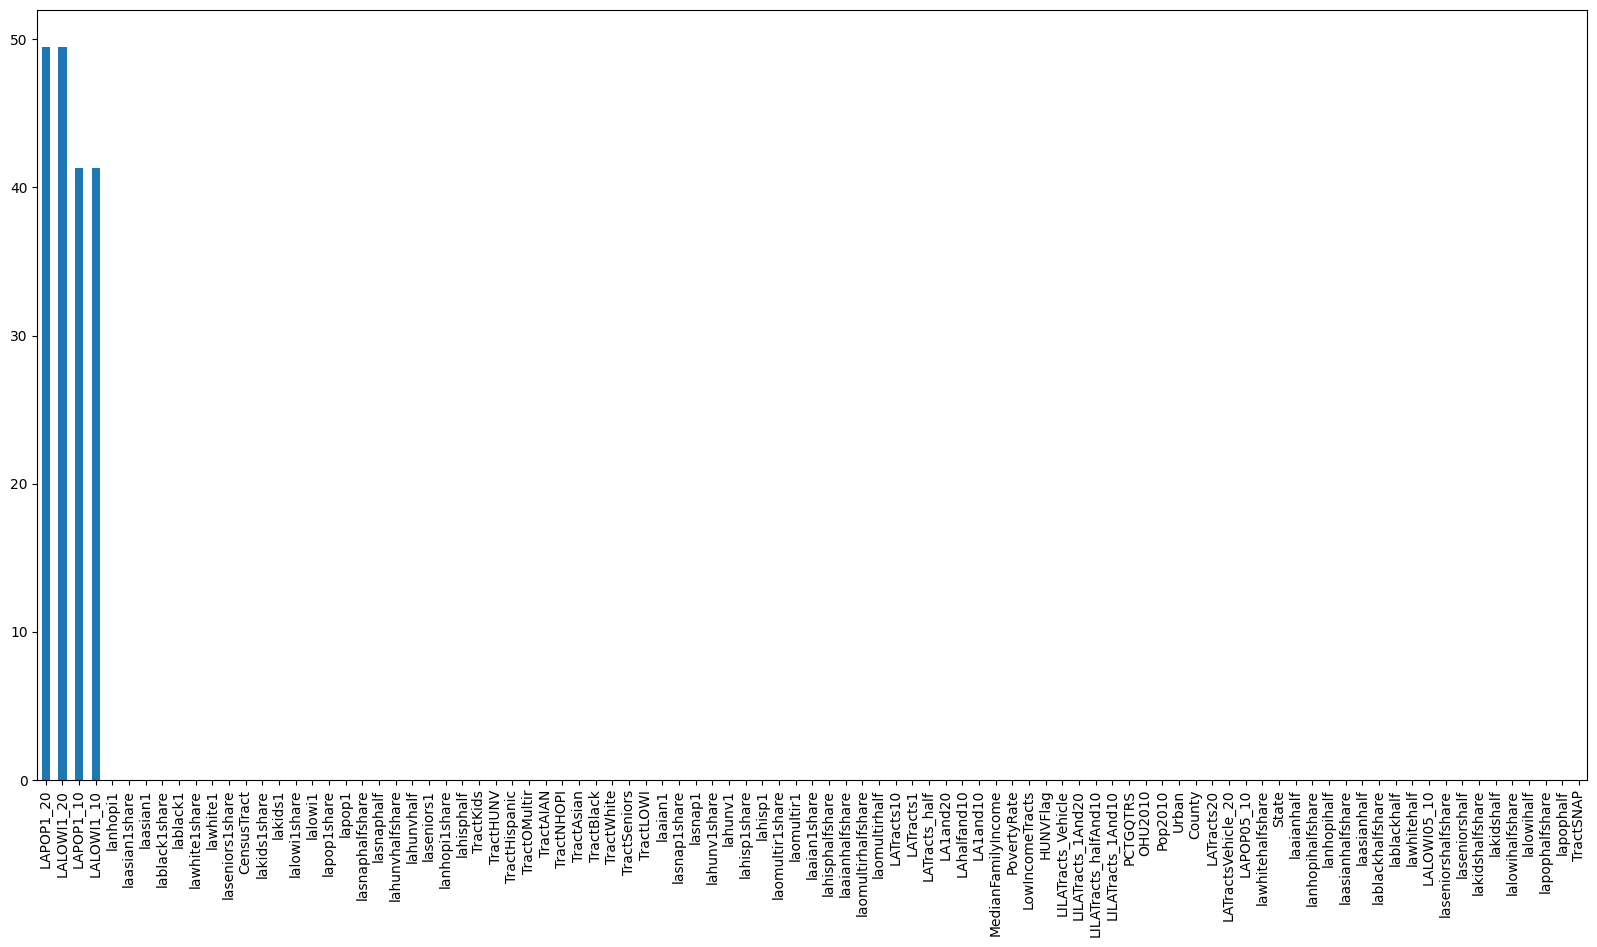

In [157]:
FoodAccessAtlascleaned_missing_report["Missing (%)"].plot(kind="bar", figsize=(20, 10))

In [158]:


# Or only a subset of columns with missing data

imputed_df_grouped = apply_knn_imputer(imputed_df_grouped, columns=cols_missing_with_grtr_30, n_neighbors=5)


In [159]:
imputed_df_grouped.to_csv("../DATA/FoodAccessAtlascleane_imputed_grpd.csv", index=False)

In [160]:
imputed_df_grouped['is_desert'] = (((imputed_df_grouped['LILATracts_halfAnd10'] == 1) | (imputed_df_grouped['LILATracts_1And20'] == 1)) & (imputed_df_grouped['HUNVFlag'] == 1)).astype(int)

# Check the resulting distribution of is_desert
print(imputed_df_grouped['is_desert'].value_counts())

is_desert
0    63977
1     8554
Name: count, dtype: int64


In [162]:

numeric_df = imputed_df_grouped.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
corr_with_is_desert = corr_matrix['is_desert'].sort_values(ascending=False)


In [ ]:
corr_with_is_desert = corr_matrix['is_desert']

# Filter for strong correlations (absolute value >= 0.7)
strong_corr = corr_with_is_desert[abs(corr_with_is_desert) >= 0.5]

print("Columns with correlation >= 0.7 or <= -0.7 with is_desert:")
print(strong_corr)


Columns with correlation >= 0.7 or <= -0.7 with is_desert:
LILATracts_halfAnd10    0.587593
LILATracts_Vehicle      0.907744
HUNVFlag                0.707464
LATractsVehicle_20      0.699215
lahunvhalf              0.627985
lahunvhalfshare         0.614621
lasnaphalf              0.503253
lasnaphalfshare         0.525244
is_desert               1.000000
Name: is_desert, dtype: float64


In [ ]:
LILATracts_halfAnd10    0.587593
LILATracts_Vehicle      0.907744
HUNVFlag                0.707464
LATractsVehicle_20      0.699215
lahunvhalf              0.627877
lahunvhalfshare         0.614936
lasnaphalf              0.500981
lasnaphalfshare         0.523319
is_desert               1.000000